In [140]:
from dataset import *
import seaborn as sns

# Explore IRT

## Explore IRT within same file

### Explore IRT within same file single file

In [141]:
def IRT_variance_file(file_path):
    """
    Compute the variance of the 'iRT' column grouped by 'Modified sequence' from the input file.

    Parameters:
    -----------
    file_path : str
        The file that will be loaded as a DataFrame for processing.

    Returns:
    --------
    pandas.Series
        A Series containing the variance of 'iRT' values for each group of 'Modified sequence'.
        The index of the Series represents the 'Modified sequence' and the values represent the variance.
    """
    df = load_dataframe(file_path)
    grouped = df.groupby("Modified sequence")
    var = grouped['iRT'].var()
    return var

def plot_hist(data,title,x_label,y_label,percentile=1):
    """
    Plot a histogram of the input data with an adjustable percentile range.

    Parameters:
    -----------
    data : pandas.Series or array-like
        The data for which the histogram will be plotted.

    title : str
        The title of the histogram plot.

    x_label : str
        The label for the x-axis.

    y_label : str
        The label for the y-axis.

    percentile : float, optional
        The percentile value used to filter out extreme values. The data is plotted within the range
        from 0 to this percentile's value. Default is 1, meaning the entire data range is plotted.
    """
    quantile = data.quantile(percentile)
    # Plot the histogram of the variance
    data.plot.hist(range=(0,quantile))
    # Add title, label for the x-axis and y-axis
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    # Display the plot
    plt.show()

In [142]:
variance = IRT_variance_file("testing/data/pool_1/Thermo_SRM_Pool_1_01_01_2xIT_2xHCD-1h-R2-tryptic-evidence.txt")
variance.describe()

count    246.000000
mean      16.631574
std       28.761378
min        0.000000
25%        0.203130
50%        5.166163
75%       18.309632
max      204.831796
Name: iRT, dtype: float64

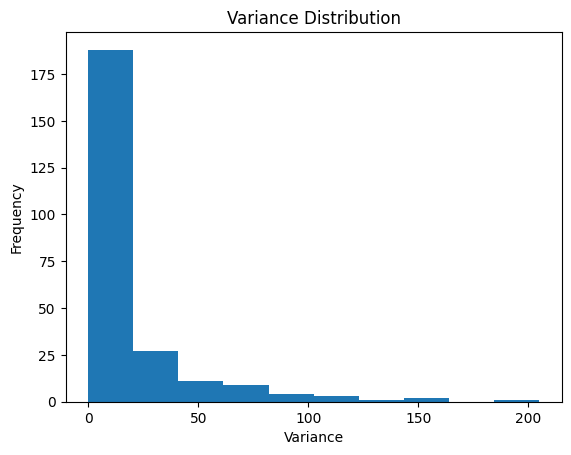

In [143]:
plot_hist(variance,"Variance Distribution","Variance","Frequency")

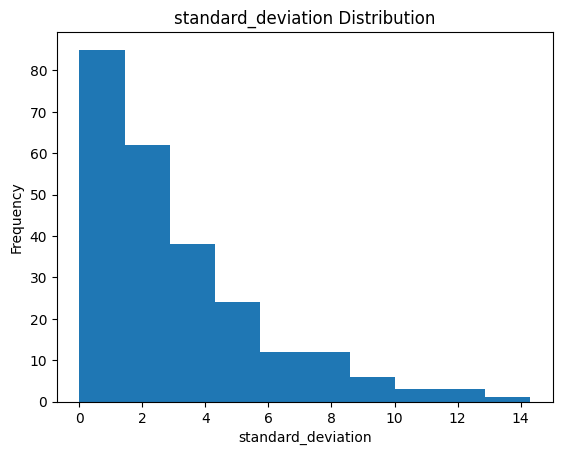

In [144]:
plot_hist(np.sqrt(variance),"standard_deviation Distribution","standard_deviation","Frequency")

<Axes: ylabel='iRT'>

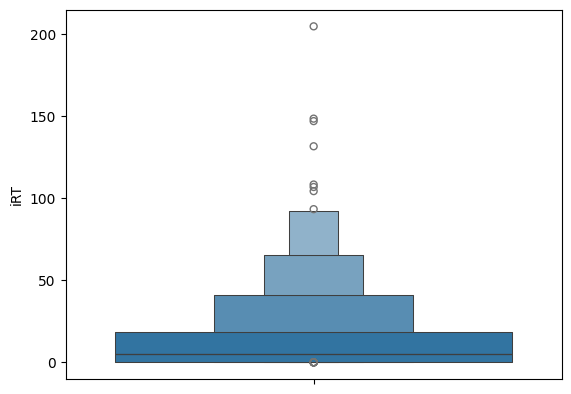

In [145]:
sns.boxenplot(data=variance)

### Explore IRT within same file all files

In [146]:
def get_variance_all_files(directory_path):
    """
    Calculate the variance of 'iRT' values for multiple files in subdirectories and combine them.

    Parameters:
    -----------
    directory_path : str
        The path to the directory containing subdirectories, each with data files to process.

    Returns:
    --------
    pandas.Series
        A Series containing the variance of 'iRT' values for each (peptide,file) combination.

    Notes:
    ------
    The directory structure should look like:
        - directory_path/
            - pool1/
                - file1.csv
                - file2.csv
            - pool2/
                - file3.csv
            ....

    """
    # Initialize a list to store variance Series
    variances = []
    
    # Loop through each subdirectory in the specified directory path
    for pool_dir in os.listdir(directory_path):
        pool_path = os.path.join(directory_path, pool_dir)
        
        # Check if the current item is a directory
        if os.path.isdir(pool_path):
            # Loop through each file in the subdirectory
            for file in os.listdir(pool_path):
                file_path = os.path.join(pool_path, file)
                # Compute the variance of 'iRT' values for the file and append to the list
                variance = IRT_variance_file(file_path)
                variances.append(variance)
    # Concatenate all the variance DataFrames into a single DataFrame
    combined_variances = pd.concat(variances, ignore_index=True)
    return combined_variances


In [147]:
variance_all_files = get_variance_all_files("testing/data")
variance_all_files.describe()

count     9988.000000
mean        64.690564
std        356.004627
min          0.000000
25%          0.035690
50%          3.910197
75%         19.613917
max      10659.155365
Name: iRT, dtype: float64

<Axes: ylabel='iRT'>

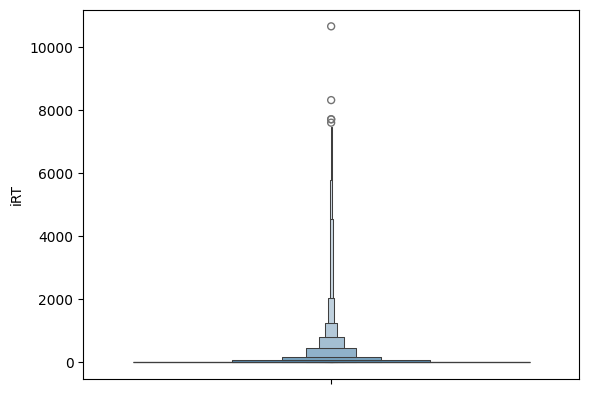

In [148]:
sns.boxenplot(data=variance_all_files)

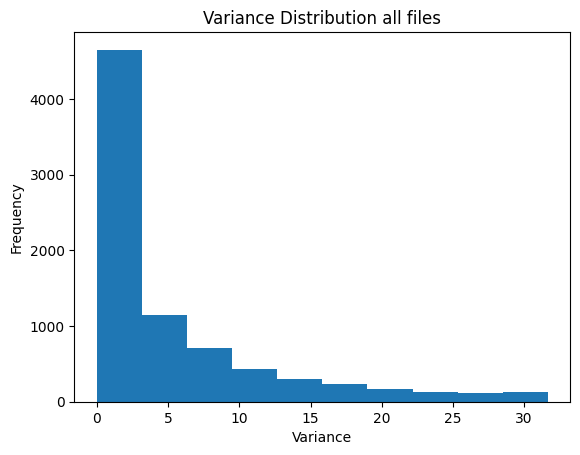

In [149]:
plot_hist(variance_all_files,"Variance Distribution all files","Variance","Frequency",0.80)

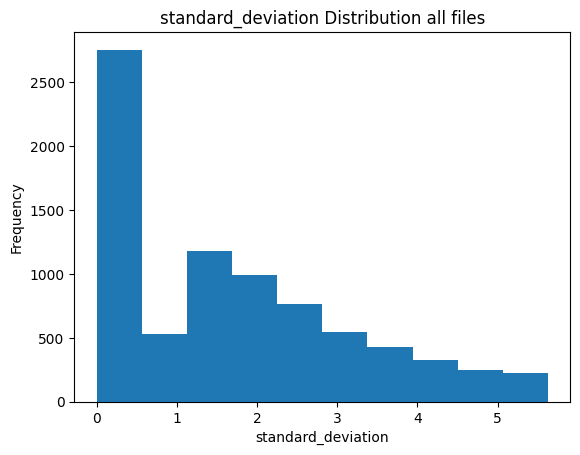

In [150]:
plot_hist(np.sqrt(variance_all_files),"standard_deviation Distribution all files","standard_deviation","Frequency",0.8)

## Explore IRT different files same pool

### Explore IRT different files same pool single pool

In [151]:
def get_variance_pool(directory_path):
    """
    Compute the variance of 'iRT' values for all peptides in a given pool (subdirectory) and return the variances 
    grouped by 'Modified sequence'.

    Parameters:
    -----------
    directory_path : str
        The path to the subdirectory (pool) containing the data files to process.

    Returns:
    --------
    pandas.Series
        A Series containing the variance of 'iRT' values for each peptide in the pool. The index 
        represents the 'Modified sequence', and the values are the variance of 'iRT' for each group.

    Notes:
    ------
    The directory structure should look like:
        - directory_path/
            - pool1/
                - file1.csv
                - file2.csv
            - pool2/
                - file3.csv
            ....
    """
    # Initialize a list to store DataFrames from each file in the pool
    dataframes = []
    # Loop through each file in the specified pool directory
    for file in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file)
        
        # Load the DataFrame from the file and append it to the list
        df = load_dataframe(file_path)
        dataframes.append(df)
    # Concatenate all the DataFrames into a single DataFrame
    combined_dataframes_pool = pd.concat(dataframes, ignore_index=True)
    # Group the combined DataFrame by 'Modified sequence'
    grouped = combined_dataframes_pool.groupby("Modified sequence")
    # Calculate the variance of the 'iRT' column for each group
    var = grouped['iRT'].var()
    return var

In [152]:
variance_pool1 = get_variance_pool("testing/data/Pool_1")

In [153]:
variance_pool1.describe()

count    2364.000000
mean       44.613849
std       227.819944
min         0.000000
25%         0.730884
50%         2.719119
75%        10.684480
max      5659.672592
Name: iRT, dtype: float64

<Axes: ylabel='iRT'>

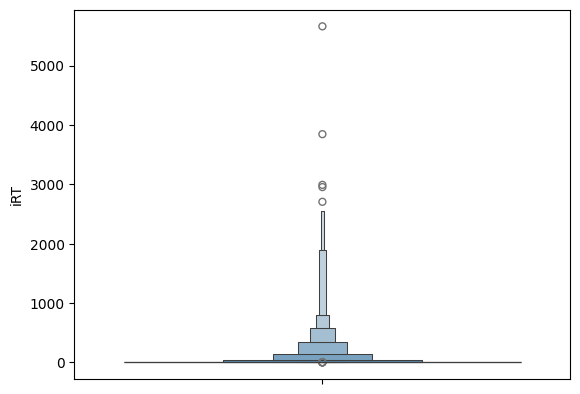

In [154]:
sns.boxenplot(data=variance_pool1)

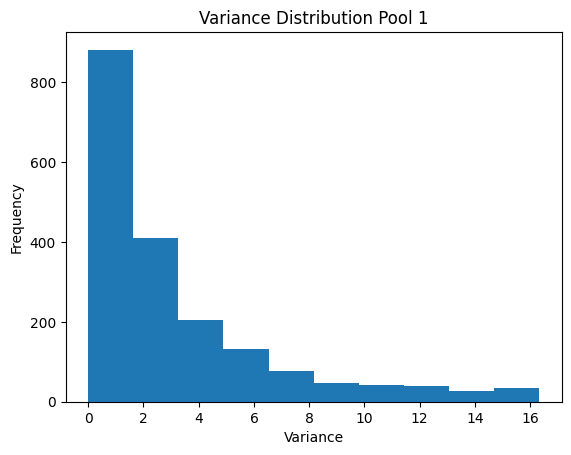

In [155]:
plot_hist(variance_pool1,"Variance Distribution Pool 1","Variance","Frequency",0.80)

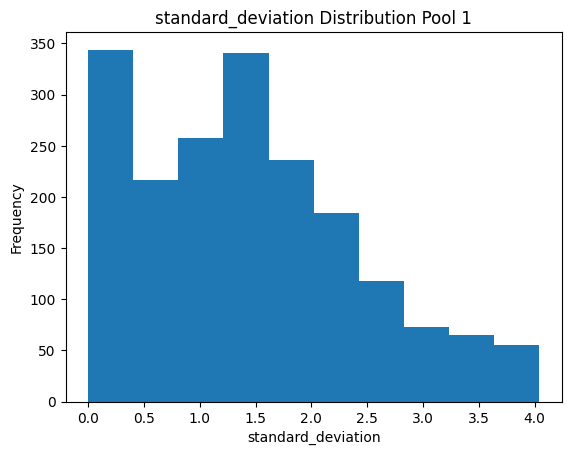

In [156]:
plot_hist(np.sqrt(variance_pool1),"standard_deviation Distribution Pool 1","standard_deviation","Frequency",0.8)

### Explore IRT different files same pool all pools

In [211]:
def get_variance_all_pools(directory_path):
    """
    Compute the variance of 'iRT' values for all peptides in each pool.

    Parameters:
    -----------
    directory_path : str
        The path to the main directory containing subdirectories (pools), each of which contains data files 
        to process.

    Returns:
    --------
    pandas.DataFrame
        A combined DataFrame containing the variance of 'iRT' values for each pool (subdirectory) in the directory.

    Notes:
    ------
    This function iterates through each subdirectory (pool) within the specified directory path. For each pool, 
    it computes the variance of 'iRT' values using the `get_variance_pool` function, which processes the files 
    in the subdirectory. The variances from all pools are then concatenated into a single DataFrame.

    Example:
    --------
    If the directory structure is as follows:

        directory_path/
            pool1/
                file1.csv
                file2.csv
            pool2/
                file3.csv

    The function will process each pool (e.g., `pool1`, `pool2`), compute the variance of 'iRT' values for each, 
    and return a combined DataFrame of variances from all pools.
    
    """
    # Initialize a list to store variance Series
    variances = []
    # Loop through each subdirectory in the specified directory path
    for pool_dir in os.listdir(directory_path):
        pool_path = os.path.join(directory_path, pool_dir)
        # Check if the current item is a directory
        if os.path.isdir(pool_path):
            variance = get_variance_pool(pool_path)
            variances.append(variance)
    # Concatenate all the variance DataFrames into a single DataFrame
    combined_variances = pd.concat(variances, ignore_index=True)
    return combined_variances


In [203]:
variance_all_pools = get_variance_all_pools("testing/data")

In [204]:
variance_all_pools.describe()

count    7690.000000
mean       37.261037
std       200.895089
min         0.000000
25%         0.405682
50%         2.151992
75%         9.339074
max      5659.672592
Name: iRT, dtype: float64

<Axes: ylabel='iRT'>

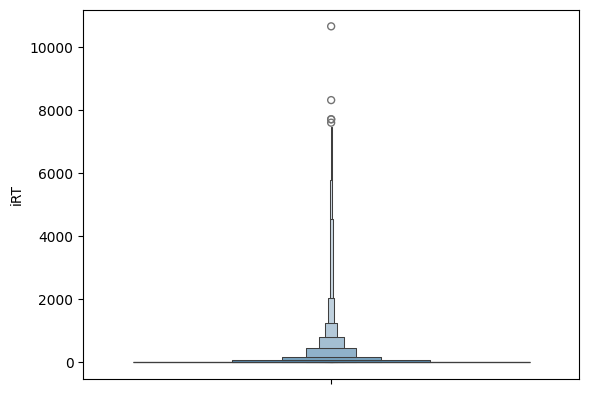

In [210]:
sns.boxenplot(data=variance_all_files)

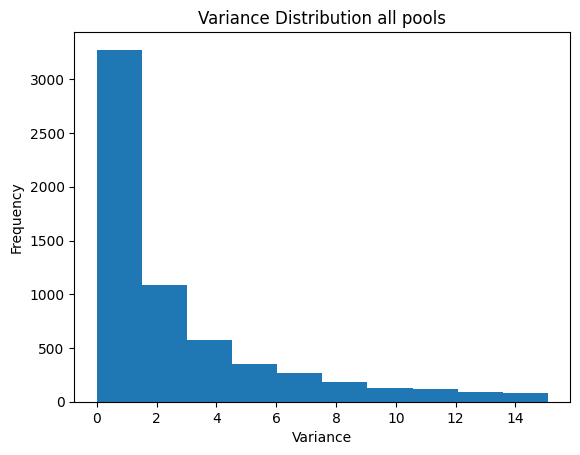

In [161]:
plot_hist(variance_all_pools,"Variance Distribution all pools","Variance","Frequency",0.80)

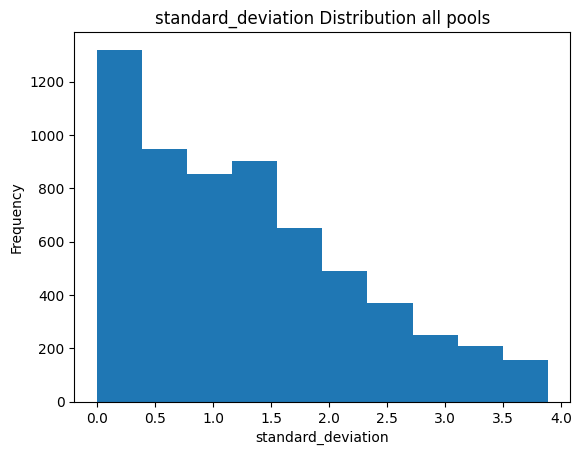

In [162]:
plot_hist(np.sqrt(variance_all_pools),"standard_deviation Distribution all pools","standard_deviation","Frequency",0.8)

## Explore IRT different pools

In [237]:
def get_variance_different_pools(directory_path):
    pools = []
    for pool_dir in os.listdir(directory_path):
        pool_path = os.path.join(directory_path, pool_dir)
        pool = []
        # Check if the current item is a directory
        if os.path.isdir(pool_path):
            for file in os.listdir(pool_path):
                file_path = os.path.join(pool_path,file)
                df = load_dataframe(file_path)
                pool.append(df)
        pool_combind_df = pd.concat(pool, ignore_index=True)
        pools.append(pool_combind_df)
    means = []
    for pool in pools:
        grouped = pool.groupby("Modified sequence")
        mean = grouped["iRT"].mean()
        means.append(mean)
    means_combined = pd.concat(means, ignore_index=False)
    means_combined_df = means_combined.reset_index()
    means_combined_df.columns = ['Modified sequence', 'mean']

    grouped = means_combined_df.groupby("Modified sequence")
    var = grouped['mean'].var()
    return var
        


In [238]:
test = get_variance_different_pools("testing/data")

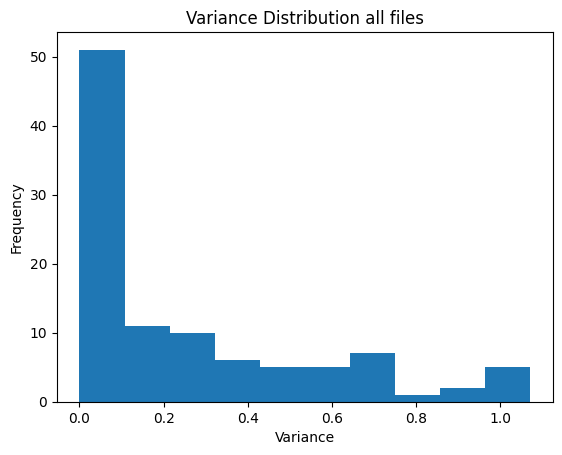

In [240]:
plot_hist(test,"Variance Distribution all files","Variance","Frequency",0.8)